In [2]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz 
!tar xvzf ta-lib-0.4.0-src.tar.gz
import os
os.chdir('ta-lib') 
!./configure --prefix=/usr
!make
!make install

os.chdir('../')
!pip install TA-Lib

--2021-12-01 09:18:49--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2021-12-01 09:18:49--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2021-12-01 09:18:49--  http://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving cfhcable.dl.s

In [3]:
import os
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import math

   
import os
import pandas as pd
import numpy as np
import pandas as pd
import statsmodels.api as sm
from numpy import *
from math import sqrt
from pandas import *
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from pickle import dump


import time
import os
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from pickle import load
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras.layers import GRU, Dense, Flatten, Conv1D, BatchNormalization, LeakyReLU, ELU, ReLU
from tensorflow.keras import Sequential, regularizers
from tensorflow.python.client import device_lib

### Importing all the required library ###
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import math
import h5py
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from numpy import array
from tensorflow.keras.models import Sequential,save_model,load_model
from tensorflow.keras.layers import LSTM
from tensorflow.keras import backend
from tensorflow.keras.layers import Dense ,LeakyReLU
from tensorflow.keras.layers import Flatten, Dropout, BatchNormalization, Reshape
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Conv1D, Conv2D ,Conv3D ,Conv2DTranspose,Conv1DTranspose
from tensorflow.keras.layers import MaxPooling1D, MaxPooling2D
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot

# import talib as ta
import csv
from tensorflow.keras import regularizers
from sklearn.metrics import mean_squared_error 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [1]:
# Code to download file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


id = '1vhAqz8lvWfxH0dcy5QTpKm5qawb6SW5K'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('AUD_USD_M30.csv') 
 
id = '13_lAB-ioAmtmWabgm5hHBXYY5ssw2QKs'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('AUD_USD_M15.csv')
 
id = '1TPA4Mtbjws9yTJdpV1kK5fDA0Vxk_2eo'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('AUD_USD_H1.csv')
 


# Dataset fill

## 15M

In [4]:
dataset_M15 = pd.read_csv('AUD_USD_M15.csv', parse_dates=[0], index_col=0)
dataset_M15.index

DatetimeIndex(['2005-01-02 18:45:00+00:00', '2005-01-02 19:15:00+00:00',
               '2005-01-02 19:45:00+00:00', '2005-01-02 20:00:00+00:00',
               '2005-01-02 20:15:00+00:00', '2005-01-02 20:30:00+00:00',
               '2005-01-02 20:45:00+00:00', '2005-01-02 21:00:00+00:00',
               '2005-01-02 21:15:00+00:00', '2005-01-02 21:30:00+00:00',
               ...
               '2021-07-30 18:30:00+00:00', '2021-07-30 18:45:00+00:00',
               '2021-07-30 19:00:00+00:00', '2021-07-30 19:15:00+00:00',
               '2021-07-30 19:30:00+00:00', '2021-07-30 19:45:00+00:00',
               '2021-07-30 20:00:00+00:00', '2021-07-30 20:15:00+00:00',
               '2021-07-30 20:30:00+00:00', '2021-07-30 20:45:00+00:00'],
              dtype='datetime64[ns, UTC]', name='datetime', length=417944, freq=None)

In [5]:
t_index_M15 = pd.date_range('2005-01-02 18:45:00+00:00',  '2021-07-30 20:45:00+00:00', freq='15T')  
dataset_M15 = dataset_M15.reindex(t_index_M15)

In [6]:
dataset_M15 = dataset_M15.reset_index(level=0)
dataset_M15 = dataset_M15.rename(columns={'index':'datetime'})

In [7]:
ful_data0_M15 = dataset_M15[dataset_M15['datetime'].dt.dayofweek == 0]  
ful_data1_M15 = dataset_M15[dataset_M15['datetime'].dt.dayofweek == 1]
ful_data2_M15 = dataset_M15[dataset_M15['datetime'].dt.dayofweek == 2]
ful_data3_M15 = dataset_M15[dataset_M15['datetime'].dt.dayofweek == 3]
ful_data4_M15 = dataset_M15[dataset_M15['datetime'].dt.dayofweek == 4]
ful_data4_M15 = ful_data4_M15[ful_data4_M15['datetime'].dt.hour.isin(np.arange(0, 22))]
ful_data6_M15 = dataset_M15[dataset_M15['datetime'].dt.dayofweek == 6]
ful_data6_M15 = ful_data6_M15[ful_data6_M15['datetime'].dt.hour.isin(np.arange(21, 24))]

In [8]:
ful_data_M15 = pd.concat([ful_data0_M15, ful_data1_M15, ful_data2_M15, ful_data3_M15, ful_data4_M15, ful_data6_M15])
ful_data_M15 = ful_data_M15.sort_values(by = 'datetime')

In [9]:
ful_data_M15 = ful_data_M15.reset_index()
ful_data_M15 = ful_data_M15.drop(labels='index',axis=1)

In [10]:
ful_data_M15 = ful_data_M15.pad()  
ful_data_M15

,datetime,open,high,low,close
0,2005-01-02 21:00:00+00:00,0.78110,0.78150,0.78110,0.78140
1,2005-01-02 21:15:00+00:00,0.78110,0.78110,0.78070,0.78090
2,2005-01-02 21:30:00+00:00,0.78080,0.78100,0.78070,0.78100
3,2005-01-02 21:45:00+00:00,0.78090,0.78090,0.78060,0.78060
4,2005-01-02 22:00:00+00:00,0.78070,0.78100,0.78070,0.78090
...,...,...,...,...,...
418651,2021-07-30 19:45:00+00:00,0.73381,0.73402,0.73331,0.73378
418652,2021-07-30 20:00:00+00:00,0.73375,0.73426,0.73365,0.73402
418653,2021-07-30 20:15:00+00:00,0.73398,0.73404,0.73384,0.73398
418654,2021-07-30 20:30:00+00:00,0.73394,0.73462,0.73387,0.73462


In [11]:
np.any(ful_data_M15.isnull())

False

## 30M

In [12]:
dataset_M30 = pd.read_csv('AUD_USD_M30.csv', parse_dates=[0], index_col=0)
dataset_M30.index

DatetimeIndex(['2005-01-02 18:30:00+00:00', '2005-01-02 19:00:00+00:00',
               '2005-01-02 19:30:00+00:00', '2005-01-02 20:00:00+00:00',
               '2005-01-02 20:30:00+00:00', '2005-01-02 21:00:00+00:00',
               '2005-01-02 21:30:00+00:00', '2005-01-02 22:00:00+00:00',
               '2005-01-02 22:30:00+00:00', '2005-01-02 23:00:00+00:00',
               ...
               '2021-07-30 16:00:00+00:00', '2021-07-30 16:30:00+00:00',
               '2021-07-30 17:00:00+00:00', '2021-07-30 17:30:00+00:00',
               '2021-07-30 18:00:00+00:00', '2021-07-30 18:30:00+00:00',
               '2021-07-30 19:00:00+00:00', '2021-07-30 19:30:00+00:00',
               '2021-07-30 20:00:00+00:00', '2021-07-30 20:30:00+00:00'],
              dtype='datetime64[ns, UTC]', name='datetime', length=209850, freq=None)

In [13]:
t_index_M30 = pd.date_range('2005-01-02 18:30:00+00:00',  '2021-07-30 20:30:00+00:00', freq='30T')
dataset_M30 = dataset_M30.reindex(t_index_M30)

In [14]:
dataset_M30 = dataset_M30.reset_index(level=0)
dataset_M30 = dataset_M30.rename(columns={'index':'datetime'})

In [15]:
ful_data0_M30 = dataset_M30[dataset_M30['datetime'].dt.dayofweek == 0]  
ful_data1_M30 = dataset_M30[dataset_M30['datetime'].dt.dayofweek == 1]
ful_data2_M30 = dataset_M30[dataset_M30['datetime'].dt.dayofweek == 2]
ful_data3_M30 = dataset_M30[dataset_M30['datetime'].dt.dayofweek == 3]
ful_data4_M30 = dataset_M30[dataset_M30['datetime'].dt.dayofweek == 4]
ful_data4_M30 = ful_data4_M30[ful_data4_M30['datetime'].dt.hour.isin(np.arange(0, 22))]
ful_data6_M30 = dataset_M30[dataset_M30['datetime'].dt.dayofweek == 6]
ful_data6_M30 = ful_data6_M30[ful_data6_M30['datetime'].dt.hour.isin(np.arange(21, 24))]

In [16]:
ful_data_M30 = pd.concat([ful_data0_M30, ful_data1_M30, ful_data2_M30, ful_data3_M30, ful_data4_M30, ful_data6_M30])
ful_data_M30 = ful_data_M30.sort_values(by = 'datetime')

In [17]:
ful_data_M30 = ful_data_M30.reset_index()
ful_data_M30 = ful_data_M30.drop(labels='index',axis=1)

In [18]:
ful_data_M30 = ful_data_M30.pad()
ful_data_M30

,datetime,open,high,low,close
0,2005-01-02 21:00:00+00:00,0.78110,0.78150,0.78070,0.78090
1,2005-01-02 21:30:00+00:00,0.78080,0.78100,0.78060,0.78060
2,2005-01-02 22:00:00+00:00,0.78070,0.78130,0.78070,0.78130
3,2005-01-02 22:30:00+00:00,0.78160,0.78240,0.78140,0.78240
4,2005-01-02 23:00:00+00:00,0.78250,0.78390,0.78220,0.78370
...,...,...,...,...,...
209323,2021-07-30 18:30:00+00:00,0.73328,0.73363,0.73310,0.73348
209324,2021-07-30 19:00:00+00:00,0.73352,0.73390,0.73352,0.73386
209325,2021-07-30 19:30:00+00:00,0.73383,0.73402,0.73331,0.73378
209326,2021-07-30 20:00:00+00:00,0.73375,0.73426,0.73365,0.73398


## 1H

In [19]:
dataset_H1 = pd.read_csv('AUD_USD_H1.csv', parse_dates=[0], index_col=0)
dataset_H1.index

DatetimeIndex(['2005-01-02 18:00:00+00:00', '2005-01-02 19:00:00+00:00',
               '2005-01-02 20:00:00+00:00', '2005-01-02 21:00:00+00:00',
               '2005-01-02 22:00:00+00:00', '2005-01-02 23:00:00+00:00',
               '2005-01-03 00:00:00+00:00', '2005-01-03 01:00:00+00:00',
               '2005-01-03 02:00:00+00:00', '2005-01-03 03:00:00+00:00',
               ...
               '2021-07-30 11:00:00+00:00', '2021-07-30 12:00:00+00:00',
               '2021-07-30 13:00:00+00:00', '2021-07-30 14:00:00+00:00',
               '2021-07-30 15:00:00+00:00', '2021-07-30 16:00:00+00:00',
               '2021-07-30 17:00:00+00:00', '2021-07-30 18:00:00+00:00',
               '2021-07-30 19:00:00+00:00', '2021-07-30 20:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='datetime', length=105627, freq=None)

In [20]:
t_index_H1 = pd.date_range('2005-01-02 18:00:00+00:00',  '2021-07-30 20:00:00+00:00', freq='1H')
dataset_H1 = dataset_H1.reindex(t_index_H1)

In [21]:
dataset_H1 = dataset_H1.reset_index(level=0)
dataset_H1 = dataset_H1.rename(columns={'index':'datetime'})

In [22]:
ful_data0_H1 = dataset_H1[dataset_H1['datetime'].dt.dayofweek == 0]  
ful_data1_H1 = dataset_H1[dataset_H1['datetime'].dt.dayofweek == 1]
ful_data2_H1 = dataset_H1[dataset_H1['datetime'].dt.dayofweek == 2]
ful_data3_H1 = dataset_H1[dataset_H1['datetime'].dt.dayofweek == 3]
ful_data4_H1 = dataset_H1[dataset_H1['datetime'].dt.dayofweek == 4]
ful_data4_H1 = ful_data4_H1[ful_data4_H1['datetime'].dt.hour.isin(np.arange(0, 22))]
ful_data6_H1 = dataset_H1[dataset_H1['datetime'].dt.dayofweek == 6]
ful_data6_H1 = ful_data6_H1[ful_data6_H1['datetime'].dt.hour.isin(np.arange(21, 24))]

In [23]:
ful_data_H1 = pd.concat([ful_data0_H1, ful_data1_H1, ful_data2_H1, ful_data3_H1, ful_data4_H1, ful_data6_H1])
ful_data_H1 = ful_data_H1.sort_values(by = 'datetime')

In [24]:
ful_data_H1 = ful_data_H1.reset_index()
ful_data_H1 = ful_data_H1.drop(labels='index',axis=1)

In [25]:
ful_data_H1 = ful_data_H1.pad()
ful_data_H1

,datetime,open,high,low,close
0,2005-01-02 21:00:00+00:00,0.78110,0.78150,0.78060,0.78060
1,2005-01-02 22:00:00+00:00,0.78070,0.78240,0.78070,0.78240
2,2005-01-02 23:00:00+00:00,0.78250,0.78390,0.78220,0.78320
3,2005-01-03 00:00:00+00:00,0.78330,0.78350,0.78130,0.78180
4,2005-01-03 01:00:00+00:00,0.78180,0.78275,0.78145,0.78155
...,...,...,...,...,...
104659,2021-07-30 16:00:00+00:00,0.73506,0.73510,0.73425,0.73434
104660,2021-07-30 17:00:00+00:00,0.73437,0.73440,0.73361,0.73394
104661,2021-07-30 18:00:00+00:00,0.73391,0.73402,0.73310,0.73348
104662,2021-07-30 19:00:00+00:00,0.73352,0.73402,0.73331,0.73378


# TA indicator

In [26]:
import talib as ta


def get_technical_indicators(data, timeperiod = 10):
    data['wma']=ta.WMA(data.close,timeperiod=timeperiod)
    data['ema']=ta.EMA(data.close,timeperiod=timeperiod)
    data['midpoint']=ta.MIDPOINT(data.close,timeperiod=timeperiod)
    data['sma']=ta.SMA(data.close,timeperiod=timeperiod)
    data['tema']=ta.TEMA(data.close,timeperiod=timeperiod)
    data['ma']=ta.MA(data.close,timeperiod=timeperiod)
    data['kama']=ta.KAMA(data.close,timeperiod=timeperiod)
    data['rocr']=ta.ROCR(data.close,timeperiod=timeperiod)
    data['DEMA']=ta.DEMA(data.close,timeperiod=timeperiod)
    data['TRIMA']=ta.TRIMA(data.close,timeperiod=timeperiod)
    data['LINEARREG']=ta.LINEARREG(data.close,timeperiod=timeperiod)
    data['TSF']=ta.TSF(data.close,timeperiod=timeperiod)


    return data

#AUD_USD_H1 data scale

In [27]:
df = ful_data_H1

In [28]:
df = df.tail(20000).reset_index(drop=True)


In [29]:
data = get_technical_indicators(df)
data = data.iloc[30:,:].reset_index(drop=True)
data

,datetime,open,high,low,close,wma,ema,midpoint,sma,tema,ma,kama,rocr,DEMA,TRIMA,LINEARREG,TSF
0,2018-06-01 16:00:00+00:00,0.75634,0.75672,0.75572,0.75666,0.755092,0.755263,0.754790,0.754806,0.756084,0.754806,0.755056,1.002385,0.755433,0.754356,0.755663,0.755853
1,2018-06-01 17:00:00+00:00,0.75665,0.75716,0.75590,0.75652,0.755403,0.755492,0.754790,0.754938,0.756478,0.754938,0.755106,1.001748,0.755817,0.754607,0.756334,0.756644
2,2018-06-01 18:00:00+00:00,0.75658,0.75728,0.75632,0.75695,0.755769,0.755757,0.754935,0.755171,0.756910,0.755171,0.755250,1.003088,0.756240,0.755029,0.756965,0.757364
3,2018-06-01 19:00:00+00:00,0.75688,0.75708,0.75628,0.75684,0.756073,0.755954,0.754935,0.755421,0.757118,0.755421,0.755394,1.003314,0.756510,0.755496,0.757376,0.757810
4,2018-06-01 20:00:00+00:00,0.75678,0.75724,0.75672,0.75688,0.756338,0.756122,0.754935,0.755649,0.757243,0.755649,0.755517,1.003021,0.756715,0.755927,0.757715,0.758175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19965,2021-07-30 16:00:00+00:00,0.73506,0.73510,0.73425,0.73434,0.736085,0.736432,0.737185,0.736950,0.734523,0.736950,0.737459,0.995149,0.735099,0.736893,0.734354,0.733777
19966,2021-07-30 17:00:00+00:00,0.73437,0.73440,0.73361,0.73394,0.735537,0.735979,0.736985,0.736431,0.733941,0.736431,0.736771,0.992978,0.734517,0.736362,0.733750,0.733155
19967,2021-07-30 18:00:00+00:00,0.73391,0.73402,0.73310,0.73348,0.735001,0.735525,0.736000,0.735776,0.733399,0.735776,0.735708,0.991149,0.733957,0.735802,0.733451,0.732934
19968,2021-07-30 19:00:00+00:00,0.73352,0.73402,0.73331,0.73378,0.734638,0.735207,0.735305,0.735302,0.733230,0.735302,0.735234,0.993582,0.733665,0.735296,0.733310,0.732867


In [30]:

data_H1_ali = data
for i in range(3):
  data_H1_ali = data_H1_ali.append(data)
data_H1_ali = data_H1_ali.sort_values(by = 'datetime')
data_H1_ali = data_H1_ali.reset_index()
data_H1_ali = data_H1_ali.drop(labels='index',axis=1)

In [31]:
data_H1_ali

,datetime,open,high,low,close,wma,ema,midpoint,sma,tema,ma,kama,rocr,DEMA,TRIMA,LINEARREG,TSF
0,2018-06-01 16:00:00+00:00,0.75634,0.75672,0.75572,0.75666,0.755092,0.755263,0.754790,0.754806,0.756084,0.754806,0.755056,1.002385,0.755433,0.754356,0.755663,0.755853
1,2018-06-01 16:00:00+00:00,0.75634,0.75672,0.75572,0.75666,0.755092,0.755263,0.754790,0.754806,0.756084,0.754806,0.755056,1.002385,0.755433,0.754356,0.755663,0.755853
2,2018-06-01 16:00:00+00:00,0.75634,0.75672,0.75572,0.75666,0.755092,0.755263,0.754790,0.754806,0.756084,0.754806,0.755056,1.002385,0.755433,0.754356,0.755663,0.755853
3,2018-06-01 16:00:00+00:00,0.75634,0.75672,0.75572,0.75666,0.755092,0.755263,0.754790,0.754806,0.756084,0.754806,0.755056,1.002385,0.755433,0.754356,0.755663,0.755853
4,2018-06-01 17:00:00+00:00,0.75665,0.75716,0.75590,0.75652,0.755403,0.755492,0.754790,0.754938,0.756478,0.754938,0.755106,1.001748,0.755817,0.754607,0.756334,0.756644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79875,2021-07-30 19:00:00+00:00,0.73352,0.73402,0.73331,0.73378,0.734638,0.735207,0.735305,0.735302,0.733230,0.735302,0.735234,0.993582,0.733665,0.735296,0.733310,0.732867
79876,2021-07-30 20:00:00+00:00,0.73375,0.73480,0.73365,0.73438,0.734470,0.735057,0.735270,0.735027,0.733445,0.735027,0.735131,0.996269,0.733672,0.734881,0.733357,0.732986
79877,2021-07-30 20:00:00+00:00,0.73375,0.73480,0.73365,0.73438,0.734470,0.735057,0.735270,0.735027,0.733445,0.735027,0.735131,0.996269,0.733672,0.734881,0.733357,0.732986
79878,2021-07-30 20:00:00+00:00,0.73375,0.73480,0.73365,0.73438,0.734470,0.735057,0.735270,0.735027,0.733445,0.735027,0.735131,0.996269,0.733672,0.734881,0.733357,0.732986


## y scale

In [32]:
def y_size_scale(column, num_point,pred_point):
    # num_point number of days that you would like to take into account
    # pred_point predicting close prices for pred_point
    
    X, Y = [], []
    for i in range(num_point ,len(column)-pred_point+1):
            
        y_holder = []
        #Taking from i to i+num_point as real data
        for j in range(i,i + pred_point):
            y_holder.append(column[j])
        Y.append(y_holder)

        #Taking from i-num_point to i
        x_holder = []
        for k in range(i-num_point,i):
            x_holder.append(column[k])
        X.append(x_holder)
    

    return array(X), array(Y)

In [33]:
num_point = 17
pred_point = 4

fake_y, real_y = y_size_scale(data_H1_ali['close'],num_point, pred_point)
H1_max_y_rows = fake_y.max(axis=1)

# fake_scaled_unshape = fake / max_of_fake_rows[:, np.newaxis]
real_scaled_unshape = real_y/H1_max_y_rows[:, np.newaxis]


# real_scaled = real_scaled_unshape.reshape((real_scaled_unshape.shape[0],1,real_scaled_unshape.shape[1]))
# fake_scaled = fake_scaled_unshape.reshape((fake_scaled_unshape.shape[0],1,fake_scaled_unshape.shape[1]))

In [34]:
fake_y.shape

(79860, 17)

In [35]:
real_y.shape

(79860, 4)

In [36]:
print(real_scaled_unshape.shape)
# print(real_scaled.shape)
# print(fake_scaled.shape)

(79860, 4)


## Feature

In [37]:
def feature_scale(column, num_point, pred_point):
    # num_point number of days that you would like to take into account
    # pred_point predicting close prices for pred_point
    
    X, Y = [], []
    for i in range(num_point ,len(column)-pred_point+1):
        #Taking from i-num_point to i
        x_holder = []
        for k in range(i-num_point,i):
            x_holder.append(column[k])
        X.append(x_holder)
    
    return array(X)

In [38]:
num_point = 17
pred_point = 4
feature_columns = [column for column in data_H1_ali]
feature_tem = np.zeros((real_scaled_unshape.shape[0], data_H1_ali.shape[1] - 1, num_point))
feature_tem.shape

(79860, 16, 17)

In [39]:
for i in range(data_H1_ali.shape[1] - 1):
  
  feature_fake = feature_scale(data_H1_ali[feature_columns[i + 1]], num_point, pred_point)
  max_feature_rows = feature_fake.max(axis=1)
  fake_scaled_unshape = feature_fake / max_feature_rows[:, np.newaxis]
  feature_tem[:,i,:] = fake_scaled_unshape


In [40]:
feature_tem_top4 = feature_tem[:,:4,:]

In [41]:
np.savez('AUD_USD_H1', AUD_USD_H1_feature = feature_tem, AUD_USD_H1_y = real_scaled_unshape)
np.savez('AUD_USD_H1_top4', AUD_USD_H1_feature_top4 = feature_tem_top4)

In [42]:
data1 = np.load('AUD_USD_H1.npz')
data2 = np.load('AUD_USD_H1_top4.npz')

In [43]:
data1['AUD_USD_H1_feature'].shape

(79860, 16, 17)

In [44]:
data2['AUD_USD_H1_feature_top4'].shape

(79860, 4, 17)

In [45]:
data1['AUD_USD_H1_y'].shape

(79860, 4)

# AUD_USD_30M data scale

In [46]:
df_30m = ful_data_M30

In [47]:
df_30m = df_30m.tail(40000).reset_index(drop=True)

In [48]:
data_30m = get_technical_indicators(df_30m)
data_30m = data_30m.iloc[60:,:].reset_index(drop=True)
data_30m

,datetime,open,high,low,close,wma,ema,midpoint,sma,tema,ma,kama,rocr,DEMA,TRIMA,LINEARREG,TSF
0,2018-06-01 16:00:00+00:00,0.75634,0.75667,0.75580,0.75620,0.755391,0.755293,0.75462,0.754786,0.756404,0.754786,0.754898,1.002944,0.755886,0.754750,0.756600,0.757003
1,2018-06-01 16:30:00+00:00,0.75624,0.75672,0.75572,0.75666,0.755731,0.755542,0.75479,0.755122,0.756732,0.755122,0.755230,1.004460,0.756230,0.755186,0.756950,0.757356
2,2018-06-01 17:00:00+00:00,0.75665,0.75716,0.75649,0.75700,0.756073,0.755807,0.75496,0.755444,0.757072,0.755444,0.755553,1.004272,0.756587,0.755606,0.757330,0.757749
3,2018-06-01 17:30:00+00:00,0.75694,0.75698,0.75590,0.75652,0.756268,0.755936,0.75556,0.755804,0.757049,0.755804,0.755797,1.004781,0.756681,0.755962,0.757197,0.757507
4,2018-06-01 18:00:00+00:00,0.75658,0.75728,0.75632,0.75728,0.756537,0.756181,0.75570,0.756112,0.757343,0.756112,0.756142,1.004084,0.756990,0.756239,0.757386,0.757669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39935,2021-07-30 18:30:00+00:00,0.73328,0.73363,0.73310,0.73348,0.734014,0.734448,0.73438,0.734368,0.733183,0.734368,0.734685,0.995143,0.733296,0.734373,0.733305,0.733069
39936,2021-07-30 19:00:00+00:00,0.73352,0.73390,0.73352,0.73386,0.733921,0.734341,0.73417,0.734202,0.733318,0.734202,0.734602,0.997743,0.733311,0.734157,0.733360,0.733173
39937,2021-07-30 19:30:00+00:00,0.73383,0.73402,0.73331,0.73378,0.733845,0.734239,0.73417,0.734070,0.733404,0.734070,0.734535,0.998204,0.733313,0.733979,0.733394,0.733244
39938,2021-07-30 20:00:00+00:00,0.73375,0.73426,0.73365,0.73398,0.733828,0.734192,0.73417,0.734000,0.733576,0.734000,0.734515,0.999047,0.733396,0.733843,0.733485,0.733371


In [49]:

data_30m_ali = data_30m
for i in range(1):
  data_30m_ali = data_30m_ali.append(data_30m)
data_30m_ali = data_30m_ali.sort_values(by = 'datetime')
data_30m_ali = data_30m_ali.reset_index()
data_30m_ali = data_30m_ali.drop(labels='index',axis=1)

In [50]:
data_30m_ali

,datetime,open,high,low,close,wma,ema,midpoint,sma,tema,ma,kama,rocr,DEMA,TRIMA,LINEARREG,TSF
0,2018-06-01 16:00:00+00:00,0.75634,0.75667,0.75580,0.75620,0.755391,0.755293,0.75462,0.754786,0.756404,0.754786,0.754898,1.002944,0.755886,0.754750,0.756600,0.757003
1,2018-06-01 16:00:00+00:00,0.75634,0.75667,0.75580,0.75620,0.755391,0.755293,0.75462,0.754786,0.756404,0.754786,0.754898,1.002944,0.755886,0.754750,0.756600,0.757003
2,2018-06-01 16:30:00+00:00,0.75624,0.75672,0.75572,0.75666,0.755731,0.755542,0.75479,0.755122,0.756732,0.755122,0.755230,1.004460,0.756230,0.755186,0.756950,0.757356
3,2018-06-01 16:30:00+00:00,0.75624,0.75672,0.75572,0.75666,0.755731,0.755542,0.75479,0.755122,0.756732,0.755122,0.755230,1.004460,0.756230,0.755186,0.756950,0.757356
4,2018-06-01 17:00:00+00:00,0.75665,0.75716,0.75649,0.75700,0.756073,0.755807,0.75496,0.755444,0.757072,0.755444,0.755553,1.004272,0.756587,0.755606,0.757330,0.757749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79875,2021-07-30 19:30:00+00:00,0.73383,0.73402,0.73331,0.73378,0.733845,0.734239,0.73417,0.734070,0.733404,0.734070,0.734535,0.998204,0.733313,0.733979,0.733394,0.733244
79876,2021-07-30 20:00:00+00:00,0.73375,0.73426,0.73365,0.73398,0.733828,0.734192,0.73417,0.734000,0.733576,0.734000,0.734515,0.999047,0.733396,0.733843,0.733485,0.733371
79877,2021-07-30 20:00:00+00:00,0.73375,0.73426,0.73365,0.73398,0.733828,0.734192,0.73417,0.734000,0.733576,0.734000,0.734515,0.999047,0.733396,0.733843,0.733485,0.733371
79878,2021-07-30 20:30:00+00:00,0.73394,0.73480,0.73379,0.73438,0.733897,0.734226,0.73384,0.733928,0.733892,0.733928,0.734510,0.999021,0.733603,0.733771,0.733836,0.733816


## y_scale

In [51]:
num_point = 17
pred_point = 4

fake_y_30m, real_y_30m = y_size_scale(data_30m_ali['close'], num_point, pred_point)
max_y_rows_30m = fake_y_30m.max(axis=1)


real_scaled_unshape_30m = real_y_30m/max_y_rows_30m[:, np.newaxis]



In [52]:
print(real_scaled_unshape_30m.shape)
# print(real_scaled.shape)
# print(fake_scaled.shape)

(79860, 4)


## feature_scale

In [53]:
num_point = 17
pred_point = 4
feature_columns = [column for column in data_30m_ali]
feature_tem_30m = np.zeros((real_scaled_unshape_30m.shape[0], data_30m_ali.shape[1] - 1, num_point))
feature_tem_30m.shape

(79860, 16, 17)

In [54]:
for i in range(data_30m.shape[1] - 1):
  
  feature_fake_30m = feature_scale(data_30m_ali[feature_columns[i + 1]], num_point, pred_point)
  max_feature_rows_30m = feature_fake_30m.max(axis=1)
  fake_scaled_unshape_30m = feature_fake_30m / max_feature_rows_30m[:, np.newaxis]
  feature_tem_30m[:,i,:] = fake_scaled_unshape_30m

In [55]:
feature_tem_30m_top4 = feature_tem_30m[:,:4,:]

In [56]:
np.savez('AUD_USD_m30', AUD_USD_m30_feature = feature_tem_30m, AUD_USD_30m_y = real_scaled_unshape_30m)
np.savez('AUD_USD_m30_top4', AUD_USD_m30_feature_top4 = feature_tem_30m_top4)

In [57]:
data3 = np.load('AUD_USD_m30.npz')
data4 = np.load('AUD_USD_m30_top4.npz')

In [58]:
data3['AUD_USD_m30_feature'].shape

(79860, 16, 17)

In [59]:
data4['AUD_USD_m30_feature_top4'].shape

(79860, 4, 17)

In [60]:
data3['AUD_USD_30m_y'].shape

(79860, 4)

# AUD_USD_15M data scale

In [61]:
df_15m = ful_data_M15

In [62]:
df_15m = df_15m.tail(80000).reset_index(drop=True)

In [63]:
data_15m = get_technical_indicators(df_15m)
data_15m = data_15m.iloc[120:,:].reset_index(drop=True)
data_15m

,datetime,open,high,low,close,wma,ema,midpoint,sma,tema,ma,kama,rocr,DEMA,TRIMA,LINEARREG,TSF
0,2018-06-01 16:00:00+00:00,0.75634,0.75667,0.75608,0.75608,0.755821,0.755539,0.755200,0.755407,0.756509,0.755407,0.755294,1.002227,0.756247,0.755536,0.756650,0.756927
1,2018-06-01 16:15:00+00:00,0.75604,0.75624,0.75580,0.75620,0.755966,0.755659,0.755200,0.755615,0.756527,0.755615,0.755424,1.002758,0.756337,0.755790,0.756667,0.756901
2,2018-06-01 16:30:00+00:00,0.75624,0.75630,0.75587,0.75589,0.756016,0.755701,0.755310,0.755796,0.756373,0.755796,0.755472,1.002400,0.756290,0.755967,0.756455,0.756601
3,2018-06-01 16:45:00+00:00,0.75589,0.75672,0.75572,0.75666,0.756173,0.755876,0.755480,0.755982,0.756597,0.755982,0.755597,1.002464,0.756500,0.756092,0.756554,0.756681
4,2018-06-01 17:00:00+00:00,0.75665,0.75716,0.75665,0.75668,0.756300,0.756022,0.756285,0.756220,0.756736,0.756220,0.755807,1.003155,0.756652,0.756187,0.756459,0.756512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79875,2021-07-30 19:45:00+00:00,0.73381,0.73402,0.73331,0.73378,0.733695,0.733841,0.733695,0.733715,0.733733,0.733715,0.733995,0.999918,0.733543,0.733618,0.733655,0.733642
79876,2021-07-30 20:00:00+00:00,0.73375,0.73426,0.73365,0.73402,0.733751,0.733873,0.733630,0.733702,0.733878,0.733702,0.733995,0.999823,0.733656,0.733645,0.733848,0.733880
79877,2021-07-30 20:15:00+00:00,0.73398,0.73404,0.73384,0.73398,0.733801,0.733893,0.733630,0.733706,0.733958,0.733706,0.733995,1.000055,0.733731,0.733700,0.733991,0.734055
79878,2021-07-30 20:30:00+00:00,0.73394,0.73462,0.73387,0.73462,0.733967,0.734025,0.733930,0.733790,0.734299,0.733790,0.734051,1.001145,0.734001,0.733785,0.734322,0.734440


## y_scale

In [64]:
num_point = 17
pred_point = 4

fake_y_15m, real_y_15m = y_size_scale(data_15m['close'], num_point, pred_point)
max_y_rows_15m = fake_y_15m.max(axis=1)


real_scaled_unshape_15m = real_y_15m/max_y_rows_15m[:, np.newaxis]


In [65]:
print(real_scaled_unshape_15m.shape)
# print(real_scaled.shape)
# print(fake_scaled.shape)

(79860, 4)


## feature

In [66]:
num_point = 17
pred_point = 4
feature_columns = [column for column in data_15m]
feature_tem_15m = np.zeros((real_scaled_unshape_15m.shape[0],data_15m.shape[1] - 1,num_point))
feature_tem_15m.shape

(79860, 16, 17)

In [67]:
for i in range(data_15m.shape[1] - 1):
  
  feature_fake_15m = feature_scale(data_15m[feature_columns[i + 1]], num_point, pred_point)
  max_feature_rows_15m = feature_fake_15m.max(axis=1)
  fake_scaled_unshape_15m = feature_fake_15m / max_feature_rows_15m[:, np.newaxis]
  feature_tem_15m[:,i,:] = fake_scaled_unshape_15m

In [68]:
feature_tem_15m_top4 = feature_tem_15m[:,:4,:]

In [69]:
np.savez('AUD_USD_m15', AUD_USD_m15_feature = feature_tem_15m, AUD_USD_15m_y = real_scaled_unshape_15m)
np.savez('AUD_USD_m15_top4', AUD_USD_m15_feature_top4 = feature_tem_15m_top4)

In [70]:
data5 = np.load('AUD_USD_m15.npz')
data6 = np.load('AUD_USD_m15_top4.npz')

In [71]:
data5['AUD_USD_m15_feature'].shape

(79860, 16, 17)

In [72]:
data6['AUD_USD_m15_feature_top4'].shape

(79860, 4, 17)

# Split data

## AUD_USD_H1 split data

In [73]:
def split_train_test(data):
    train_size = round(data.shape[0] * 0.7)
    valid_size = round(data.shape[0] * 0.15)
    data_train = data[0:train_size]
    data_valid = data[train_size: train_size + valid_size]
    data_test = data[train_size + valid_size:]
    return data_train, data_valid, data_test

In [74]:
data_H1 = np.load('AUD_USD_H1.npz')
data_H1_top4 = np.load('AUD_USD_H1_top4.npz')

In [75]:
H1_X = data_H1['AUD_USD_H1_feature']
H1_X_top4 = data_H1_top4['AUD_USD_H1_feature_top4']

In [76]:
H1_y = data_H1['AUD_USD_H1_y']

In [77]:
# H1_x_trans = np.zeros((H1_X.shape[0], H1_X.shape[1], 18))

# for i in range(H1_X.shape[0]):
#   H1_x_trans[i, :, :-1] = H1_X[i]
#   H1_x_trans[i, :, -1] = H1_X[i, :, -1]

In [78]:
train_H1_X, valid_H1_X, test_H1_X = split_train_test(H1_X)
train_H1_X_top4, valid_H1_X_top4, test_H1_X_top4 = split_train_test(H1_X_top4)
train_H1_y, valid_H1_y, test_H1_y = split_train_test(H1_y)

In [79]:
print(train_H1_X.shape)
print(valid_H1_X.shape)
print(test_H1_X.shape)
print(train_H1_X_top4.shape)
print(valid_H1_X_top4.shape)
print(test_H1_X_top4.shape)
print(train_H1_y.shape)
print(valid_H1_y.shape)
print(test_H1_y.shape)

(55902, 16, 17)
(11979, 16, 17)
(11979, 16, 17)
(55902, 4, 17)
(11979, 4, 17)
(11979, 4, 17)
(55902, 4)
(11979, 4)
(11979, 4)


## AUD_USD_M30 split data

In [80]:
data_m30 = np.load('AUD_USD_m30.npz')
data_m30_top4 = np.load('AUD_USD_m30_top4.npz')
m30_X = data_m30['AUD_USD_m30_feature']
m30_X_top4 = data_m30_top4['AUD_USD_m30_feature_top4']
m30_y = data_m30['AUD_USD_30m_y']

In [81]:
# m30_x_trans = np.zeros((m30_X.shape[0], m30_X.shape[1], 18))

# for i in range(m30_X.shape[0]):
#   m30_x_trans[i, :, :-1] = m30_X[i]
#   m30_x_trans[i, :, -1] = m30_X[i, :, -1]

In [82]:
train_m30_X, valid_m30_X, test_m30_X = split_train_test(m30_X)
train_m30_X_top4, valid_m30_X_top4, test_m30_X_top4 = split_train_test(m30_X_top4)
train_m30_y, valid_m30_y, test_m30_y = split_train_test(m30_y)

In [83]:
print(train_m30_X.shape)
print(valid_m30_X.shape)
print(test_m30_X.shape)
print(train_m30_X_top4.shape)
print(valid_m30_X_top4.shape)
print(test_m30_X_top4.shape)
print(train_m30_y.shape)
print(valid_m30_y.shape)
print(test_m30_y.shape)

(55902, 16, 17)
(11979, 16, 17)
(11979, 16, 17)
(55902, 4, 17)
(11979, 4, 17)
(11979, 4, 17)
(55902, 4)
(11979, 4)
(11979, 4)


## AUD_USD_M15 split data

In [84]:
data_m15 = np.load('AUD_USD_m15.npz')
data_m15_top4 = np.load('AUD_USD_m15_top4.npz')
m15_X = data_m15['AUD_USD_m15_feature']
m15_X_top4 = data_m15_top4['AUD_USD_m15_feature_top4']
m15_y = data_m15['AUD_USD_15m_y']

In [85]:
# m15_x_trans = np.zeros((m15_X.shape[0], m15_X.shape[1], 18))

# for i in range(m15_X.shape[0]):
#   m15_x_trans[i, :, :-1] = m15_X[i]
#   m15_x_trans[i, :, -1] = m15_X[i, :, -1]

In [86]:
train_m15_X, valid_m15_X, test_m15_X = split_train_test(m15_X)
train_m15_X_top4, valid_m15_X_top4, test_m15_X_top4 = split_train_test(m15_X_top4)
train_m15_y, valid_m15_y, test_m15_y = split_train_test(m15_y)

In [87]:
print(train_m15_X.shape)
print(valid_m15_X.shape)
print(test_m15_X.shape)
print(train_m15_X_top4.shape)
print(valid_m15_X_top4.shape)
print(test_m15_X_top4.shape)
print(train_m15_y.shape)
print(valid_m15_y.shape)
print(test_m15_y.shape)

(55902, 16, 17)
(11979, 16, 17)
(11979, 16, 17)
(55902, 4, 17)
(11979, 4, 17)
(11979, 4, 17)
(55902, 4)
(11979, 4)
(11979, 4)


# Functional API

## API test

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
!pip install keras_self_attention
from keras_self_attention import SeqSelfAttention

  Created wheel for keras-self-attention: filename=keras_self_attention-0.50.0-py3-none-any.whl size=19414 sha256=53fe20410663422f6877c2aa20e2a9508bf07d6fc368f7642572d0e09a0c388d
  Stored in directory: /root/.cache/pip/wheels/92/7a/a3/231bef5803298e7ec1815215bc0613239cb1e9c03c57b13c14
Successfully built keras-self-attention


In [ ]:
def scaled_dot_product_attention(q, k, v, mask):


  matmul_qk = tf.matmul(q, k, transpose_b=True)  # (..., seq_len_q, seq_len_k)

  # scale matmul_qk
  dk = tf.cast(tf.shape(k)[-1], tf.float32)
  scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

  # add the mask to the scaled tensor.
  if mask is not None:
    scaled_attention_logits += (mask * -1e9)

  # softmax is normalized on the last axis (seq_len_k) so that the scores
  # add up to 1.
  attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)  # (..., seq_len_q, seq_len_k)

  output = tf.matmul(attention_weights, v)  # (..., seq_len_q, depth_v)

  return output, attention_weights

In [ ]:
class MultiHeadAttention(tf.keras.layers.Layer):
  def __init__(self, d_model, num_heads):
    super(MultiHeadAttention, self).__init__()
    self.num_heads = num_heads
    self.d_model = d_model

    assert d_model % self.num_heads == 0

    self.depth = d_model // self.num_heads

    self.wq = tf.keras.layers.Dense(d_model)
    self.wk = tf.keras.layers.Dense(d_model)
    self.wv = tf.keras.layers.Dense(d_model)

    self.dense = tf.keras.layers.Dense(d_model)

  def split_heads(self, x, batch_size):
    """Split the last dimension into (num_heads, depth).
    Transpose the result such that the shape is (batch_size, num_heads, seq_len, depth)
    """
    x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
    return tf.transpose(x, perm=[0, 2, 1, 3])

  def call(self, v, k, q, mask):
    batch_size = tf.shape(q)[0]

    q = self.wq(q)  # (batch_size, seq_len, d_model)
    k = self.wk(k)  # (batch_size, seq_len, d_model)
    v = self.wv(v)  # (batch_size, seq_len, d_model)

    q = self.split_heads(q, batch_size)  # (batch_size, num_heads, seq_len_q, depth)
    k = self.split_heads(k, batch_size)  # (batch_size, num_heads, seq_len_k, depth)
    v = self.split_heads(v, batch_size)  # (batch_size, num_heads, seq_len_v, depth)

    # scaled_attention.shape == (batch_size, num_heads, seq_len_q, depth)
    # attention_weights.shape == (batch_size, num_heads, seq_len_q, seq_len_k)
    scaled_attention, attention_weights = scaled_dot_product_attention(
        q, k, v, mask)

    scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])  # (batch_size, seq_len_q, num_heads, depth)

    # concat_attention = tf.reshape(scaled_attention,
    #                               (batch_size, -1, self.d_model))  # (batch_size, seq_len_q, d_model)

    concat_attention = tf.reshape(scaled_attention,
                                  (batch_size, self.d_model))  # (batch_size, seq_len_q, d_model)

    output = self.dense(concat_attention)  # (batch_size, seq_len_q, d_model)

    # return output, attention_weights
    return output

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers.embeddings import Embedding
from tensorflow.keras import Input

In [ ]:
input_shape_H1=(16, 17)
input_shape_M30=(16, 17)
input_shape_M15=(16, 17)
output_dim = 4
inp_H1 = keras.Input(shape=input_shape_H1, name='X_H1')
x_H1 = Conv1D(17,3, padding='same')(inp_H1)
# x_H1 = Conv1D(16,3, padding='same')(x_H1)


x_attention1 = tf.keras.layers.MultiHeadAttention(num_heads=1, key_dim=17)(x_H1,x_H1)
x_H1 = x_attention1 + x_H1


x_H1 = LSTM(units= 128, return_sequences=True)(x_H1)
x_H1 = LSTM(units= 128)(x_H1)

inp_M30 = keras.Input(shape=input_shape_M30, name='X_M30')
x_M30 = Conv1D(17,3, padding='same')(inp_M30)
x_attention2 = tf.keras.layers.MultiHeadAttention(num_heads=1, key_dim=17)(x_M30,x_M30)
x_M30 = x_attention2 + x_M30
# x_M30 = Conv1D(16,3, padding='same')(x_M30)
x_M30 = LSTM(units= 128, return_sequences=True)(x_M30)
x_M30 = LSTM(units= 128)(x_M30)

inp_M15 = Input(shape=input_shape_M15, name='X_M15')
x_M15 = Conv1D(17,3, padding='same')(inp_M15)
# x_M15 = Conv1D(16,3, padding='same')(x_M15)
x_attention3 = tf.keras.layers.MultiHeadAttention(num_heads=1, key_dim=17)(x_M15,x_M15)
x_M15 = x_attention3 + x_M15
x_M15 = LSTM(units= 128, return_sequences=True)(x_M15)
x_M15 = LSTM(units= 128)(x_M15)

x = layers.concatenate([x_H1, x_M30, x_M15])


x_attention4 =  MultiHeadAttention(384,2)(x, x, x, None)
x = x_attention4 + x


x = Dense(256)(x)
x = Dense(128)(x)
out = Dense(units=output_dim, name="priority")(x)

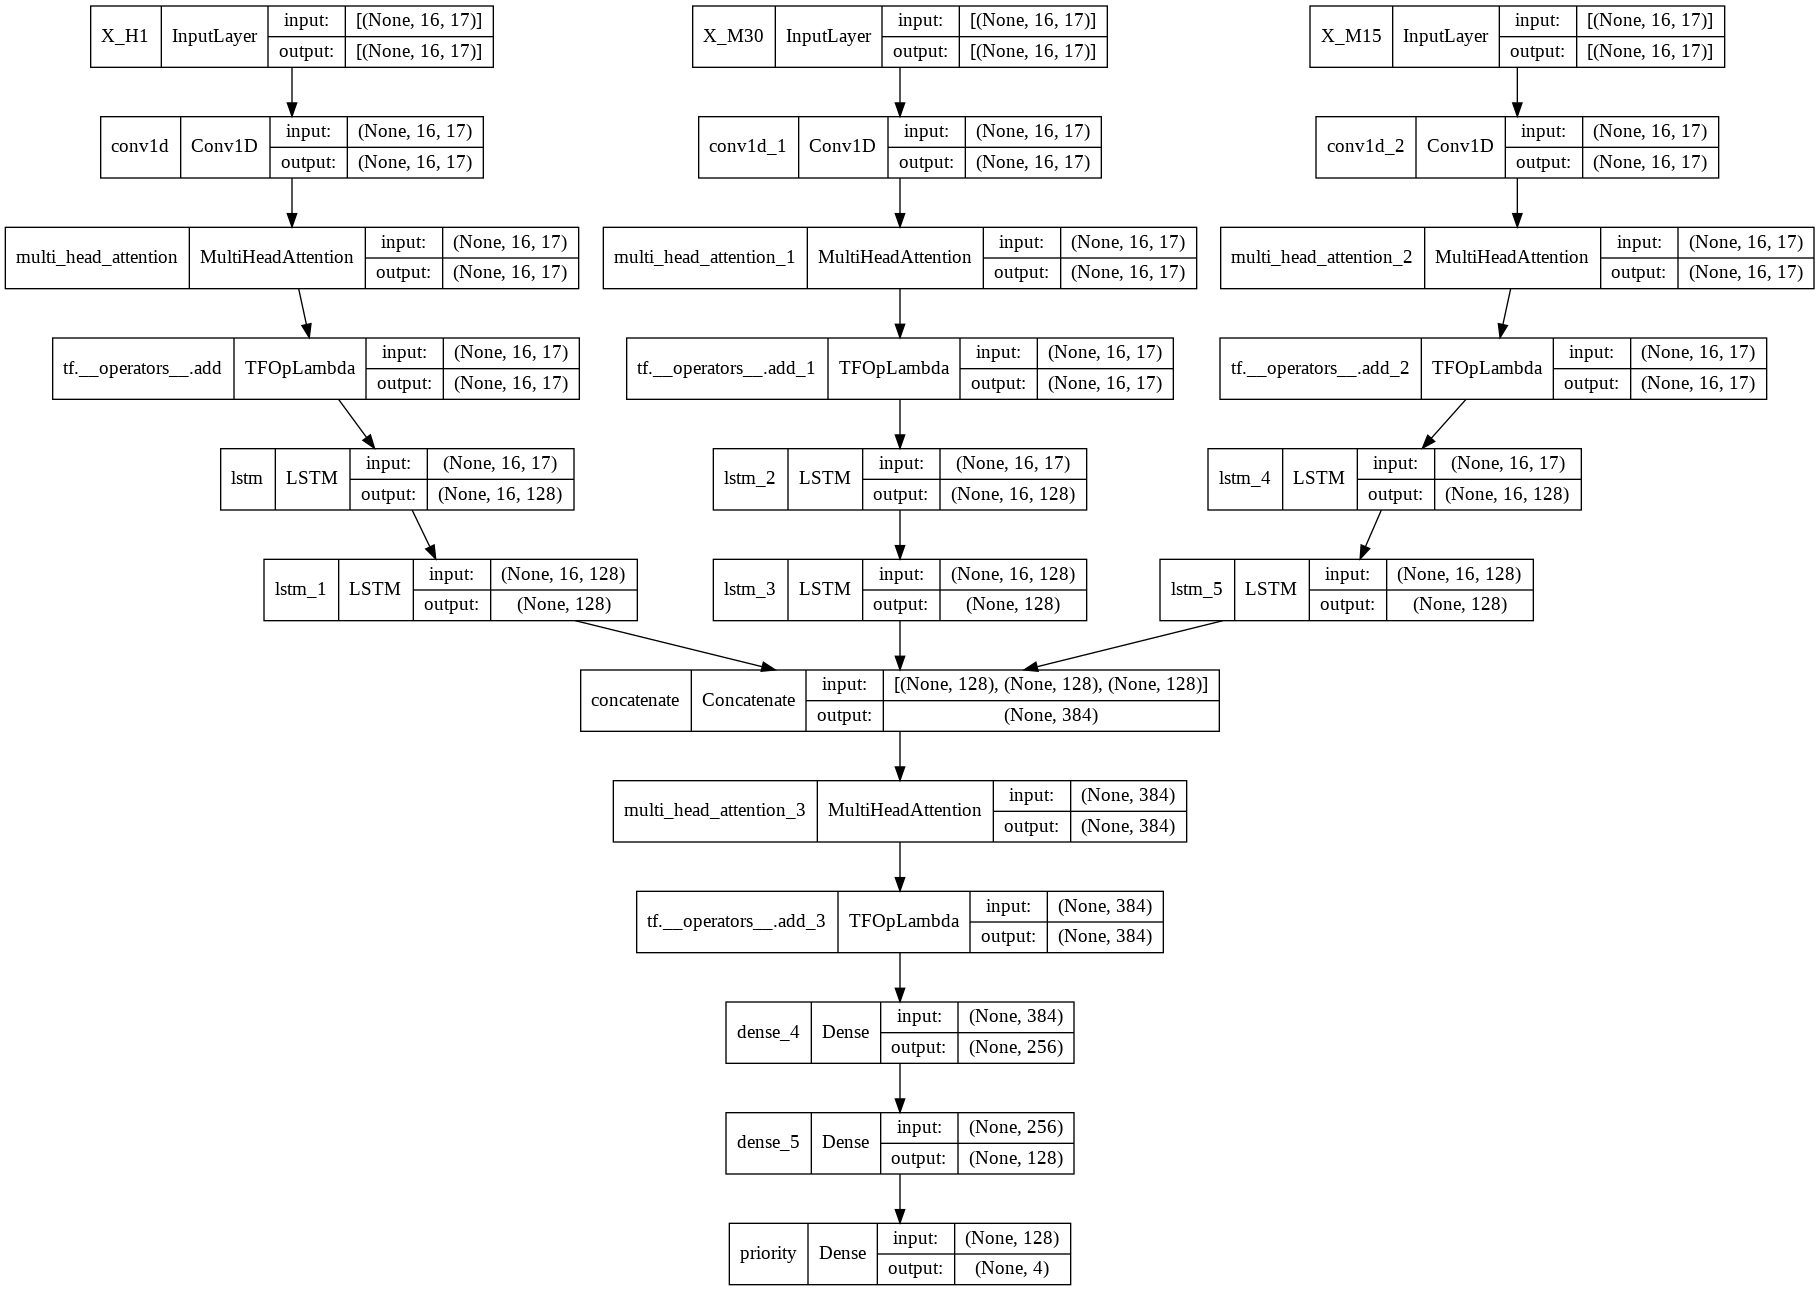

In [ ]:
from keras.layers.embeddings import Embedding
model2 = keras.Model(inputs=[inp_H1, inp_M30, inp_M15], outputs=[out])
keras.utils.plot_model(model2, "multi_input_and_output_model.png", show_shapes=True)

In [ ]:
model2.compile(
    optimizer = keras.optimizers.Adam(1e-3),
    loss={"priority": 'mean_squared_error',}
)

In [ ]:
tf.config.experimental_run_functions_eagerly(True)

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger, Callback

best_model_path = os.path.join(r'/content/checkpoint/model_{epoch:03d}', 'best_model_keras')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,
                   patience=20, min_delta=1e-8)
rlp = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, verbose=1, mode='min',
                        min_delta=1e-8, cooldown=1, min_lr=1e-5)
mcp = ModelCheckpoint(best_model_path, monitor='val_loss', verbose=1,
                      save_best_only=True, save_weights_only=False, mode='min') 

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [ ]:
model2.fit(
    {"X_H1": train_H1_X, "X_M30": train_m30_X, "X_M15": train_m15_X},{"priority": train_m15_y},
    epochs=100,
    batch_size=128,
    validation_data=({"X_H1": valid_H1_X, "X_M30": valid_m30_X, "X_M15": valid_m15_X}, {"priority": valid_m15_y}),
    callbacks=[mcp, rlp, es]
    # callbacks=[rlp, es]
    )


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/100
437/437 [==============================] - ETA: 0s - loss: 0.0166
Epoch 00001: val_loss improved from inf to 0.00009, saving model to /content/checkpoint/model_001/best_model_keras


INFO:tensorflow:Assets written to: /content/checkpoint/model_001/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_001/best_model_keras/assets


437/437 [==============================] - 158s 324ms/step - loss: 0.0166 - val_loss: 8.5866e-05 - lr: 0.0010
Epoch 2/100
437/437 [==============================] - ETA: 0s - loss: 1.2277e-04
Epoch 00002: val_loss did not improve from 0.00009
437/437 [==============================] - 68s 155ms/step - loss: 1.2277e-04 - val_loss: 2.6941e-04 - lr: 0.0010
Epoch 3/100
437/437 [==============================] - ETA: 0s - loss: 4.6482e-05
Epoch 00003: val_loss improved from 0.00009 to 0.00003, saving model to /content/checkpoint/model_003/best_model_keras


INFO:tensorflow:Assets written to: /content/checkpoint/model_003/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_003/best_model_keras/assets


437/437 [==============================] - 142s 326ms/step - loss: 4.6482e-05 - val_loss: 3.1769e-05 - lr: 0.0010
Epoch 4/100
437/437 [==============================] - ETA: 0s - loss: 6.5819e-05
Epoch 00004: val_loss did not improve from 0.00003
437/437 [==============================] - 68s 156ms/step - loss: 6.5819e-05 - val_loss: 5.9850e-05 - lr: 0.0010
Epoch 5/100
437/437 [==============================] - ETA: 0s - loss: 5.6739e-05
Epoch 00005: val_loss did not improve from 0.00003
437/437 [==============================] - 71s 161ms/step - loss: 5.6739e-05 - val_loss: 1.3421e-04 - lr: 0.0010
Epoch 6/100
437/437 [==============================] - ETA: 0s - loss: 6.0351e-05
Epoch 00006: val_loss improved from 0.00003 to 0.00002, saving model to /content/checkpoint/model_006/best_model_keras


INFO:tensorflow:Assets written to: /content/checkpoint/model_006/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_006/best_model_keras/assets


437/437 [==============================] - 138s 317ms/step - loss: 6.0351e-05 - val_loss: 1.8876e-05 - lr: 0.0010
Epoch 7/100
437/437 [==============================] - ETA: 0s - loss: 6.0645e-05
Epoch 00007: val_loss improved from 0.00002 to 0.00001, saving model to /content/checkpoint/model_007/best_model_keras


INFO:tensorflow:Assets written to: /content/checkpoint/model_007/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_007/best_model_keras/assets


437/437 [==============================] - 139s 319ms/step - loss: 6.0645e-05 - val_loss: 1.3778e-05 - lr: 0.0010
Epoch 8/100
437/437 [==============================] - ETA: 0s - loss: 6.9527e-05
Epoch 00008: val_loss did not improve from 0.00001
437/437 [==============================] - 70s 159ms/step - loss: 6.9527e-05 - val_loss: 9.3982e-05 - lr: 0.0010
Epoch 9/100
437/437 [==============================] - ETA: 0s - loss: 7.3605e-05
Epoch 00009: val_loss did not improve from 0.00001
437/437 [==============================] - 66s 152ms/step - loss: 7.3605e-05 - val_loss: 3.0534e-05 - lr: 0.0010
Epoch 10/100
437/437 [==============================] - ETA: 0s - loss: 6.0190e-05
Epoch 00010: val_loss did not improve from 0.00001
437/437 [==============================] - 65s 150ms/step - loss: 6.0190e-05 - val_loss: 1.1746e-04 - lr: 0.0010
Epoch 11/100
437/437 [==============================] - ETA: 0s - loss: 5.7742e-05
Epoch 00011: val_loss did not improve from 0.00001

Epoch 00011:

INFO:tensorflow:Assets written to: /content/checkpoint/model_012/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_012/best_model_keras/assets


437/437 [==============================] - 135s 310ms/step - loss: 1.3325e-05 - val_loss: 3.9620e-06 - lr: 5.0000e-04
Epoch 13/100
437/437 [==============================] - ETA: 0s - loss: 5.3704e-06
Epoch 00013: val_loss improved from 0.00000 to 0.00000, saving model to /content/checkpoint/model_013/best_model_keras


INFO:tensorflow:Assets written to: /content/checkpoint/model_013/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_013/best_model_keras/assets


437/437 [==============================] - 138s 316ms/step - loss: 5.3704e-06 - val_loss: 3.6912e-06 - lr: 5.0000e-04
Epoch 14/100
437/437 [==============================] - ETA: 0s - loss: 8.4612e-06
Epoch 00014: val_loss did not improve from 0.00000
437/437 [==============================] - 67s 154ms/step - loss: 8.4612e-06 - val_loss: 4.2521e-06 - lr: 5.0000e-04
Epoch 15/100
437/437 [==============================] - ETA: 0s - loss: 2.3643e-05
Epoch 00015: val_loss did not improve from 0.00000
437/437 [==============================] - 67s 154ms/step - loss: 2.3643e-05 - val_loss: 1.5165e-05 - lr: 5.0000e-04
Epoch 16/100
437/437 [==============================] - ETA: 0s - loss: 3.2160e-05
Epoch 00016: val_loss did not improve from 0.00000
437/437 [==============================] - 69s 159ms/step - loss: 3.2160e-05 - val_loss: 8.5149e-06 - lr: 5.0000e-04
Epoch 17/100
437/437 [==============================] - ETA: 0s - loss: 2.9393e-05
Epoch 00017: val_loss did not improve from 0.0

INFO:tensorflow:Assets written to: /content/checkpoint/model_018/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_018/best_model_keras/assets


437/437 [==============================] - 138s 315ms/step - loss: 5.4999e-06 - val_loss: 3.2615e-06 - lr: 2.5000e-04
Epoch 19/100
437/437 [==============================] - ETA: 0s - loss: 5.0289e-06
Epoch 00019: val_loss did not improve from 0.00000
437/437 [==============================] - 68s 156ms/step - loss: 5.0289e-06 - val_loss: 3.9047e-06 - lr: 2.5000e-04
Epoch 20/100
437/437 [==============================] - ETA: 0s - loss: 7.8662e-06
Epoch 00020: val_loss did not improve from 0.00000
437/437 [==============================] - 69s 157ms/step - loss: 7.8662e-06 - val_loss: 3.9717e-06 - lr: 2.5000e-04
Epoch 21/100
437/437 [==============================] - ETA: 0s - loss: 1.1246e-05
Epoch 00021: val_loss did not improve from 0.00000
437/437 [==============================] - 68s 155ms/step - loss: 1.1246e-05 - val_loss: 9.1120e-06 - lr: 2.5000e-04
Epoch 22/100
437/437 [==============================] - ETA: 0s - loss: 1.4444e-05
Epoch 00022: val_loss did not improve from 0.0

INFO:tensorflow:Assets written to: /content/checkpoint/model_028/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_028/best_model_keras/assets


437/437 [==============================] - 137s 313ms/step - loss: 4.4055e-06 - val_loss: 2.9772e-06 - lr: 6.2500e-05
Epoch 29/100
437/437 [==============================] - ETA: 0s - loss: 4.5459e-06
Epoch 00029: val_loss did not improve from 0.00000
437/437 [==============================] - 67s 153ms/step - loss: 4.5459e-06 - val_loss: 4.2187e-06 - lr: 6.2500e-05
Epoch 30/100
437/437 [==============================] - ETA: 0s - loss: 4.7995e-06
Epoch 00030: val_loss did not improve from 0.00000
437/437 [==============================] - 66s 152ms/step - loss: 4.7995e-06 - val_loss: 6.1411e-06 - lr: 6.2500e-05
Epoch 31/100
437/437 [==============================] - ETA: 0s - loss: 4.8618e-06
Epoch 00031: val_loss did not improve from 0.00000
437/437 [==============================] - 67s 153ms/step - loss: 4.8618e-06 - val_loss: 3.1352e-06 - lr: 6.2500e-05
Epoch 32/100
437/437 [==============================] - ETA: 0s - loss: 4.8911e-06
Epoch 00032: val_loss improved from 0.00000 to

INFO:tensorflow:Assets written to: /content/checkpoint/model_032/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_032/best_model_keras/assets


437/437 [==============================] - 138s 315ms/step - loss: 4.8911e-06 - val_loss: 2.8380e-06 - lr: 6.2500e-05
Epoch 33/100
437/437 [==============================] - ETA: 0s - loss: 5.2772e-06
Epoch 00033: val_loss did not improve from 0.00000
437/437 [==============================] - 67s 154ms/step - loss: 5.2772e-06 - val_loss: 3.8219e-06 - lr: 6.2500e-05
Epoch 34/100
437/437 [==============================] - ETA: 0s - loss: 5.1862e-06
Epoch 00034: val_loss improved from 0.00000 to 0.00000, saving model to /content/checkpoint/model_034/best_model_keras


INFO:tensorflow:Assets written to: /content/checkpoint/model_034/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_034/best_model_keras/assets


437/437 [==============================] - 139s 318ms/step - loss: 5.1862e-06 - val_loss: 2.7667e-06 - lr: 6.2500e-05
Epoch 35/100
437/437 [==============================] - ETA: 0s - loss: 5.2849e-06
Epoch 00035: val_loss did not improve from 0.00000
437/437 [==============================] - 67s 153ms/step - loss: 5.2849e-06 - val_loss: 5.5521e-06 - lr: 6.2500e-05
Epoch 36/100
437/437 [==============================] - ETA: 0s - loss: 4.6146e-06
Epoch 00036: val_loss improved from 0.00000 to 0.00000, saving model to /content/checkpoint/model_036/best_model_keras


INFO:tensorflow:Assets written to: /content/checkpoint/model_036/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_036/best_model_keras/assets


437/437 [==============================] - 138s 317ms/step - loss: 4.6146e-06 - val_loss: 2.6461e-06 - lr: 6.2500e-05
Epoch 37/100
437/437 [==============================] - ETA: 0s - loss: 4.4618e-06
Epoch 00037: val_loss improved from 0.00000 to 0.00000, saving model to /content/checkpoint/model_037/best_model_keras


INFO:tensorflow:Assets written to: /content/checkpoint/model_037/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_037/best_model_keras/assets


437/437 [==============================] - 138s 317ms/step - loss: 4.4618e-06 - val_loss: 2.4718e-06 - lr: 6.2500e-05
Epoch 38/100
437/437 [==============================] - ETA: 0s - loss: 5.0502e-06
Epoch 00038: val_loss did not improve from 0.00000
437/437 [==============================] - 67s 153ms/step - loss: 5.0502e-06 - val_loss: 2.7674e-06 - lr: 6.2500e-05
Epoch 39/100
437/437 [==============================] - ETA: 0s - loss: 4.7723e-06
Epoch 00039: val_loss did not improve from 0.00000
437/437 [==============================] - 67s 154ms/step - loss: 4.7723e-06 - val_loss: 3.2357e-06 - lr: 6.2500e-05
Epoch 40/100
437/437 [==============================] - ETA: 0s - loss: 5.0330e-06
Epoch 00040: val_loss did not improve from 0.00000
437/437 [==============================] - 67s 154ms/step - loss: 5.0330e-06 - val_loss: 3.0802e-06 - lr: 6.2500e-05
Epoch 41/100
437/437 [==============================] - ETA: 0s - loss: 4.6107e-06
Epoch 00041: val_loss did not improve from 0.0

INFO:tensorflow:Assets written to: /content/checkpoint/model_044/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_044/best_model_keras/assets


437/437 [==============================] - 133s 306ms/step - loss: 3.3501e-06 - val_loss: 2.4470e-06 - lr: 3.1250e-05
Epoch 45/100
437/437 [==============================] - ETA: 0s - loss: 3.6947e-06
Epoch 00045: val_loss did not improve from 0.00000
437/437 [==============================] - 67s 153ms/step - loss: 3.6947e-06 - val_loss: 4.3277e-06 - lr: 3.1250e-05
Epoch 46/100
437/437 [==============================] - ETA: 0s - loss: 3.7677e-06
Epoch 00046: val_loss did not improve from 0.00000
437/437 [==============================] - 65s 148ms/step - loss: 3.7677e-06 - val_loss: 2.7268e-06 - lr: 3.1250e-05
Epoch 47/100
437/437 [==============================] - ETA: 0s - loss: 3.5121e-06
Epoch 00047: val_loss did not improve from 0.00000
437/437 [==============================] - 65s 149ms/step - loss: 3.5121e-06 - val_loss: 5.1238e-06 - lr: 3.1250e-05
Epoch 48/100
437/437 [==============================] - ETA: 0s - loss: 3.2800e-06
Epoch 00048: val_loss improved from 0.00000 to

INFO:tensorflow:Assets written to: /content/checkpoint/model_048/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_048/best_model_keras/assets


437/437 [==============================] - 132s 304ms/step - loss: 3.2800e-06 - val_loss: 2.3346e-06 - lr: 3.1250e-05
Epoch 49/100
437/437 [==============================] - ETA: 0s - loss: 3.4733e-06
Epoch 00049: val_loss improved from 0.00000 to 0.00000, saving model to /content/checkpoint/model_049/best_model_keras


INFO:tensorflow:Assets written to: /content/checkpoint/model_049/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_049/best_model_keras/assets


437/437 [==============================] - 134s 308ms/step - loss: 3.4733e-06 - val_loss: 2.2897e-06 - lr: 3.1250e-05
Epoch 50/100
437/437 [==============================] - ETA: 0s - loss: 3.3843e-06
Epoch 00050: val_loss improved from 0.00000 to 0.00000, saving model to /content/checkpoint/model_050/best_model_keras


INFO:tensorflow:Assets written to: /content/checkpoint/model_050/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_050/best_model_keras/assets


437/437 [==============================] - 135s 308ms/step - loss: 3.3843e-06 - val_loss: 2.0332e-06 - lr: 3.1250e-05
Epoch 51/100
437/437 [==============================] - ETA: 0s - loss: 3.3735e-06
Epoch 00051: val_loss did not improve from 0.00000
437/437 [==============================] - 66s 151ms/step - loss: 3.3735e-06 - val_loss: 3.3913e-06 - lr: 3.1250e-05
Epoch 52/100
437/437 [==============================] - ETA: 0s - loss: 3.3475e-06
Epoch 00052: val_loss did not improve from 0.00000
437/437 [==============================] - 66s 152ms/step - loss: 3.3475e-06 - val_loss: 5.6235e-06 - lr: 3.1250e-05
Epoch 53/100
437/437 [==============================] - ETA: 0s - loss: 3.3019e-06
Epoch 00053: val_loss did not improve from 0.00000
437/437 [==============================] - 65s 149ms/step - loss: 3.3019e-06 - val_loss: 4.1061e-06 - lr: 3.1250e-05
Epoch 54/100
437/437 [==============================] - ETA: 0s - loss: 3.2269e-06
Epoch 00054: val_loss did not improve from 0.0

INFO:tensorflow:Assets written to: /content/checkpoint/model_055/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_055/best_model_keras/assets


437/437 [==============================] - 136s 313ms/step - loss: 2.8052e-06 - val_loss: 1.8942e-06 - lr: 1.5625e-05
Epoch 56/100
437/437 [==============================] - ETA: 0s - loss: 2.8813e-06
Epoch 00056: val_loss did not improve from 0.00000
437/437 [==============================] - 66s 152ms/step - loss: 2.8813e-06 - val_loss: 1.9465e-06 - lr: 1.5625e-05
Epoch 57/100
437/437 [==============================] - ETA: 0s - loss: 2.8474e-06
Epoch 00057: val_loss did not improve from 0.00000
437/437 [==============================] - 68s 155ms/step - loss: 2.8474e-06 - val_loss: 2.2183e-06 - lr: 1.5625e-05
Epoch 58/100
437/437 [==============================] - ETA: 0s - loss: 2.8064e-06
Epoch 00058: val_loss improved from 0.00000 to 0.00000, saving model to /content/checkpoint/model_058/best_model_keras


INFO:tensorflow:Assets written to: /content/checkpoint/model_058/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_058/best_model_keras/assets


437/437 [==============================] - 134s 307ms/step - loss: 2.8064e-06 - val_loss: 1.8254e-06 - lr: 1.5625e-05
Epoch 59/100
437/437 [==============================] - ETA: 0s - loss: 2.7576e-06
Epoch 00059: val_loss did not improve from 0.00000
437/437 [==============================] - 66s 150ms/step - loss: 2.7576e-06 - val_loss: 2.3042e-06 - lr: 1.5625e-05
Epoch 60/100
437/437 [==============================] - ETA: 0s - loss: 2.8568e-06
Epoch 00060: val_loss improved from 0.00000 to 0.00000, saving model to /content/checkpoint/model_060/best_model_keras


INFO:tensorflow:Assets written to: /content/checkpoint/model_060/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_060/best_model_keras/assets


437/437 [==============================] - 135s 309ms/step - loss: 2.8568e-06 - val_loss: 1.7650e-06 - lr: 1.5625e-05
Epoch 61/100
437/437 [==============================] - ETA: 0s - loss: 2.8556e-06
Epoch 00061: val_loss did not improve from 0.00000
437/437 [==============================] - 66s 151ms/step - loss: 2.8556e-06 - val_loss: 2.0279e-06 - lr: 1.5625e-05
Epoch 62/100
437/437 [==============================] - ETA: 0s - loss: 2.8875e-06
Epoch 00062: val_loss improved from 0.00000 to 0.00000, saving model to /content/checkpoint/model_062/best_model_keras


INFO:tensorflow:Assets written to: /content/checkpoint/model_062/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_062/best_model_keras/assets


437/437 [==============================] - 135s 310ms/step - loss: 2.8875e-06 - val_loss: 1.7566e-06 - lr: 1.5625e-05
Epoch 63/100
437/437 [==============================] - ETA: 0s - loss: 2.7549e-06
Epoch 00063: val_loss did not improve from 0.00000
437/437 [==============================] - 67s 152ms/step - loss: 2.7549e-06 - val_loss: 1.8283e-06 - lr: 1.5625e-05
Epoch 64/100
437/437 [==============================] - ETA: 0s - loss: 2.8153e-06
Epoch 00064: val_loss did not improve from 0.00000

Epoch 00064: ReduceLROnPlateau reducing learning rate to 1e-05.
437/437 [==============================] - 66s 150ms/step - loss: 2.8153e-06 - val_loss: 1.7720e-06 - lr: 1.5625e-05
Epoch 65/100
437/437 [==============================] - ETA: 0s - loss: 2.6712e-06
Epoch 00065: val_loss improved from 0.00000 to 0.00000, saving model to /content/checkpoint/model_065/best_model_keras


INFO:tensorflow:Assets written to: /content/checkpoint/model_065/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_065/best_model_keras/assets


437/437 [==============================] - 135s 309ms/step - loss: 2.6712e-06 - val_loss: 1.7257e-06 - lr: 1.0000e-05
Epoch 66/100
437/437 [==============================] - ETA: 0s - loss: 2.6189e-06
Epoch 00066: val_loss did not improve from 0.00000
437/437 [==============================] - 65s 148ms/step - loss: 2.6189e-06 - val_loss: 2.3999e-06 - lr: 1.0000e-05
Epoch 67/100
437/437 [==============================] - ETA: 0s - loss: 2.6920e-06
Epoch 00067: val_loss did not improve from 0.00000
437/437 [==============================] - 65s 149ms/step - loss: 2.6920e-06 - val_loss: 2.3523e-06 - lr: 1.0000e-05
Epoch 68/100
437/437 [==============================] - ETA: 0s - loss: 2.5871e-06
Epoch 00068: val_loss improved from 0.00000 to 0.00000, saving model to /content/checkpoint/model_068/best_model_keras


INFO:tensorflow:Assets written to: /content/checkpoint/model_068/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_068/best_model_keras/assets


437/437 [==============================] - 134s 307ms/step - loss: 2.5871e-06 - val_loss: 1.7036e-06 - lr: 1.0000e-05
Epoch 69/100
437/437 [==============================] - ETA: 0s - loss: 2.6344e-06
Epoch 00069: val_loss did not improve from 0.00000
437/437 [==============================] - 68s 155ms/step - loss: 2.6344e-06 - val_loss: 1.9080e-06 - lr: 1.0000e-05
Epoch 70/100
437/437 [==============================] - ETA: 0s - loss: 2.6015e-06
Epoch 00070: val_loss did not improve from 0.00000
437/437 [==============================] - 64s 147ms/step - loss: 2.6015e-06 - val_loss: 2.1198e-06 - lr: 1.0000e-05
Epoch 71/100
437/437 [==============================] - ETA: 0s - loss: 2.6059e-06
Epoch 00071: val_loss did not improve from 0.00000
437/437 [==============================] - 65s 150ms/step - loss: 2.6059e-06 - val_loss: 1.7331e-06 - lr: 1.0000e-05
Epoch 72/100
437/437 [==============================] - ETA: 0s - loss: 2.6229e-06
Epoch 00072: val_loss did not improve from 0.0

INFO:tensorflow:Assets written to: /content/checkpoint/model_073/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_073/best_model_keras/assets


437/437 [==============================] - 131s 299ms/step - loss: 2.6417e-06 - val_loss: 1.6798e-06 - lr: 1.0000e-05
Epoch 74/100
437/437 [==============================] - ETA: 0s - loss: 2.6206e-06
Epoch 00074: val_loss did not improve from 0.00000
437/437 [==============================] - 65s 148ms/step - loss: 2.6206e-06 - val_loss: 1.7975e-06 - lr: 1.0000e-05
Epoch 75/100
437/437 [==============================] - ETA: 0s - loss: 2.6041e-06
Epoch 00075: val_loss did not improve from 0.00000
437/437 [==============================] - 66s 150ms/step - loss: 2.6041e-06 - val_loss: 2.1261e-06 - lr: 1.0000e-05
Epoch 76/100
437/437 [==============================] - ETA: 0s - loss: 2.5231e-06
Epoch 00076: val_loss did not improve from 0.00000
437/437 [==============================] - 67s 154ms/step - loss: 2.5231e-06 - val_loss: 2.7619e-06 - lr: 1.0000e-05
Epoch 77/100
437/437 [==============================] - ETA: 0s - loss: 2.6218e-06
Epoch 00077: val_loss did not improve from 0.0

INFO:tensorflow:Assets written to: /content/checkpoint/model_081/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_081/best_model_keras/assets


437/437 [==============================] - 130s 298ms/step - loss: 2.5462e-06 - val_loss: 1.6421e-06 - lr: 1.0000e-05
Epoch 82/100
437/437 [==============================] - ETA: 0s - loss: 2.5231e-06
Epoch 00082: val_loss improved from 0.00000 to 0.00000, saving model to /content/checkpoint/model_082/best_model_keras


INFO:tensorflow:Assets written to: /content/checkpoint/model_082/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_082/best_model_keras/assets


437/437 [==============================] - 135s 309ms/step - loss: 2.5231e-06 - val_loss: 1.6401e-06 - lr: 1.0000e-05
Epoch 83/100
437/437 [==============================] - ETA: 0s - loss: 2.5534e-06
Epoch 00083: val_loss did not improve from 0.00000
437/437 [==============================] - 68s 155ms/step - loss: 2.5534e-06 - val_loss: 1.8884e-06 - lr: 1.0000e-05
Epoch 84/100
437/437 [==============================] - ETA: 0s - loss: 2.4841e-06
Epoch 00084: val_loss did not improve from 0.00000
437/437 [==============================] - 66s 150ms/step - loss: 2.4841e-06 - val_loss: 1.6698e-06 - lr: 1.0000e-05
Epoch 85/100
437/437 [==============================] - ETA: 0s - loss: 2.5749e-06
Epoch 00085: val_loss improved from 0.00000 to 0.00000, saving model to /content/checkpoint/model_085/best_model_keras


INFO:tensorflow:Assets written to: /content/checkpoint/model_085/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_085/best_model_keras/assets


437/437 [==============================] - 133s 305ms/step - loss: 2.5749e-06 - val_loss: 1.6308e-06 - lr: 1.0000e-05
Epoch 86/100
437/437 [==============================] - ETA: 0s - loss: 2.5405e-06
Epoch 00086: val_loss did not improve from 0.00000
437/437 [==============================] - 66s 150ms/step - loss: 2.5405e-06 - val_loss: 1.6399e-06 - lr: 1.0000e-05
Epoch 87/100
437/437 [==============================] - ETA: 0s - loss: 2.5219e-06
Epoch 00087: val_loss did not improve from 0.00000
437/437 [==============================] - 67s 153ms/step - loss: 2.5219e-06 - val_loss: 1.6332e-06 - lr: 1.0000e-05
Epoch 88/100
437/437 [==============================] - ETA: 0s - loss: 2.4356e-06
Epoch 00088: val_loss did not improve from 0.00000
437/437 [==============================] - 64s 147ms/step - loss: 2.4356e-06 - val_loss: 1.6860e-06 - lr: 1.0000e-05
Epoch 89/100
437/437 [==============================] - ETA: 0s - loss: 2.5736e-06
Epoch 00089: val_loss did not improve from 0.0

INFO:tensorflow:Assets written to: /content/checkpoint/model_092/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_092/best_model_keras/assets


437/437 [==============================] - 133s 306ms/step - loss: 2.4988e-06 - val_loss: 1.6302e-06 - lr: 1.0000e-05
Epoch 93/100
437/437 [==============================] - ETA: 0s - loss: 2.4622e-06
Epoch 00093: val_loss did not improve from 0.00000
437/437 [==============================] - 68s 155ms/step - loss: 2.4622e-06 - val_loss: 1.7778e-06 - lr: 1.0000e-05
Epoch 94/100
437/437 [==============================] - ETA: 0s - loss: 2.5088e-06
Epoch 00094: val_loss improved from 0.00000 to 0.00000, saving model to /content/checkpoint/model_094/best_model_keras


INFO:tensorflow:Assets written to: /content/checkpoint/model_094/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_094/best_model_keras/assets


437/437 [==============================] - 135s 310ms/step - loss: 2.5088e-06 - val_loss: 1.6080e-06 - lr: 1.0000e-05
Epoch 95/100
437/437 [==============================] - ETA: 0s - loss: 2.4419e-06
Epoch 00095: val_loss did not improve from 0.00000
437/437 [==============================] - 67s 153ms/step - loss: 2.4419e-06 - val_loss: 1.9114e-06 - lr: 1.0000e-05
Epoch 96/100
437/437 [==============================] - ETA: 0s - loss: 2.4898e-06
Epoch 00096: val_loss did not improve from 0.00000
437/437 [==============================] - 67s 153ms/step - loss: 2.4898e-06 - val_loss: 1.9072e-06 - lr: 1.0000e-05
Epoch 97/100
437/437 [==============================] - ETA: 0s - loss: 2.4811e-06
Epoch 00097: val_loss did not improve from 0.00000
437/437 [==============================] - 67s 153ms/step - loss: 2.4811e-06 - val_loss: 2.0846e-06 - lr: 1.0000e-05
Epoch 98/100
437/437 [==============================] - ETA: 0s - loss: 2.4180e-06
Epoch 00098: val_loss did not improve from 0.0

INFO:tensorflow:Assets written to: /content/checkpoint/model_099/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_099/best_model_keras/assets


437/437 [==============================] - 137s 315ms/step - loss: 2.3472e-06 - val_loss: 1.5820e-06 - lr: 1.0000e-05
Epoch 100/100
437/437 [==============================] - ETA: 0s - loss: 2.4385e-06
Epoch 00100: val_loss did not improve from 0.00000
437/437 [==============================] - 67s 153ms/step - loss: 2.4385e-06 - val_loss: 2.0925e-06 - lr: 1.0000e-05


# Load model to evaluate

In [88]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#Downloading files
!pip install googledrivedownloader
from google_drive_downloader import GoogleDriveDownloader as gdd

In [89]:
gdd.download_file_from_google_drive(file_id='1IslMAx90xCOyMjRiVg1QZBpowMGzSd3s',dest_path='./model.zip',unzip=True)
model_load = load_model(r'/content/model')
prd_price = model_load.predict({"X_H1": test_H1_X, "X_M30": test_m30_X, "X_M15": test_m15_X})

Unzipping...Done.


In [90]:
predict_price_inver= prd_price * max_y_rows_15m[int(m15_X.shape[0] * 0.85):, np.newaxis]
real_price = test_m15_y * max_y_rows_15m[int(m15_X.shape[0] * 0.85):, np.newaxis]

print('Mean_squared_error = ', mean_squared_error(real_price, predict_price_inver))    # The smaller the better
print('Root mean_squared_error = ', math.sqrt(mean_squared_error(real_price, predict_price_inver)))    # The smaller the better
print('Explained_variance_score = ', explained_variance_score(real_price, predict_price_inver))   # The closer to 1, the better
print('R2_score = ', r2_score(real_price, predict_price_inver, multioutput='variance_weighted'))   # The closer to 1, the better

Mean_squared_error =  1.1853638626707735e-06
Root mean_squared_error =  0.0010887441676862262
Explained_variance_score =  0.995682938761479
R2_score =  0.9940001253324741


# Evaluate if you have train the model

In [ ]:
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
model2 = load_model('checkpoint/model_099/best_model_keras')
# model2 = load_model("model_AUD_USD")
prd_price = model2.predict({"X_H1": test_H1_X, "X_M30": test_m30_X, "X_M15": test_m15_X})


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


In [ ]:
predict_price_inver= prd_price * max_y_rows_15m[int(m15_X.shape[0] * 0.85):, np.newaxis]

In [ ]:
real_price = test_m15_y * max_y_rows_15m[int(m15_X.shape[0] * 0.85):, np.newaxis]

In [ ]:
print('Mean_squared_error = ', mean_squared_error(real_price, predict_price_inver))    # The smaller the better
print('Root mean_squared_error = ', math.sqrt(mean_squared_error(real_price, predict_price_inver)))    # The smaller the better
print('Explained_variance_score = ', explained_variance_score(real_price, predict_price_inver))   # The closer to 1, the better
print('R2_score = ', r2_score(real_price, predict_price_inver, multioutput='variance_weighted'))   # The closer to 1, the better

Mean_squared_error =  1.185367426084558e-06
Root mean_squared_error =  0.0010887458041639278
Explained_variance_score =  0.9956829384955143
R2_score =  0.994000107295788
